In [15]:
import pandas as pd
data = pd.read_csv(
    'https://raw.githubusercontent.com/cambridgecoding/machinelearningregression/master/data/bikes.csv')
data.head()

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.0
1,2011-01-04,2.896673,54.267219,15.136882,108.0
2,2011-01-05,4.235654,45.697702,17.034578,82.0
3,2011-01-06,3.112643,50.237349,10.091568,88.0
4,2011-01-07,2.723918,49.144928,15.738204,148.0


In [16]:
data['date'] = data['date'].apply(pd.to_datetime)
data['year']=[i.year for i in data['date']]
data['month']=[i.month_name()[0:3] for i in data['date']]
data['day']=[i.day_name()[0:3] for i in data['date']]
data.head()

,date,temperature,humidity,windspeed,count,year,month,day
0,2011-01-03,2.716070,45.715346,21.414957,120.0,2011,Jan,Mon
1,2011-01-04,2.896673,54.267219,15.136882,108.0,2011,Jan,Tue
2,2011-01-05,4.235654,45.697702,17.034578,82.0,2011,Jan,Wed
3,2011-01-06,3.112643,50.237349,10.091568,88.0,2011,Jan,Thu
4,2011-01-07,2.723918,49.144928,15.738204,148.0,2011,Jan,Fri


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

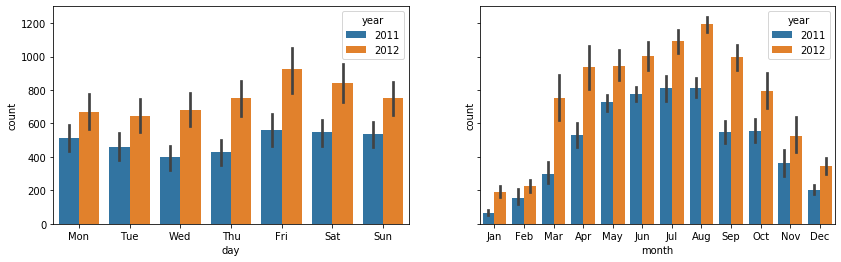

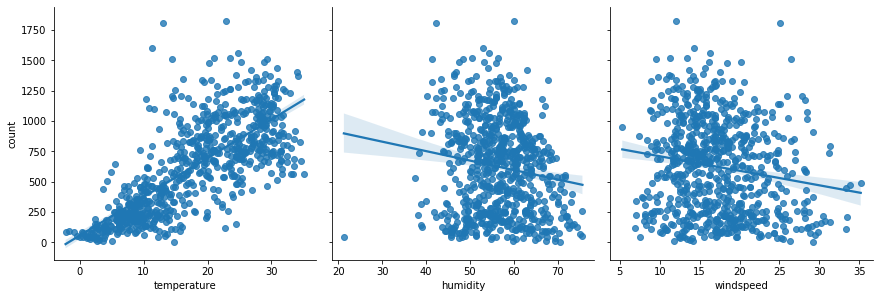

In [18]:
# shift tab 하면 함수 help

figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,4), sharey=True)
bp1 = sns.barplot(data=data, x='day', y='count', hue='year', ax=ax1)
bp2 = sns.barplot(data=data, x='month', y='count', hue='year', ax=ax2)
pp = sns.pairplot(data=data,
y_vars=['count'],
x_vars=['temperature', 'humidity', 'windspeed'],
kind='reg',
height=4)

In [19]:
#import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split,GridSearchCV,RepeatedKFold
import numpy as np

x=data[['temperature','humidity','windspeed']]
y=data['count']

X_train,X_test,y_train,y_test=train_test_split(
    x,y,test_size=0.1,random_state=1)

classifier=Ridge()
classifier.fit(X_train,y_train)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [20]:
# classifier.score(X_test,y_test)가 0.75이길래 좋은 줄 알았는데.. 
# 위 셀에서 classifier가 너무 단순해서 예측값이 이상하다고 생각함
# gridsearchcv를 이용해보면 예측값이 더 나아질 것이다 --> 아니었음 
'''param_grid = {'alpha': np.logspace(-3, 3, 13)}

grid = GridSearchCV(Ridge(), param_grid, cv=RepeatedKFold(10, 5),
                    return_train_score=True)
grid.fit(X_train, y_train)

print(grid.predict([[2.716070,45.715346,21.414957]]), classifier.predict([[2.716070,45.715346,21.414957]]))
'''
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)
#knn_model.score(X_test,y_test)
print(knn_model.predict([[4.235654,45.697702,17.034578]]))
print(grid.predict([[4.235654,45.697702,17.034578]]), classifier.predict([[4.235654,45.697702,17.034578]]))


[132.33333333]
[340.42475964] [339.69501128]


R^2 score: 0.75329


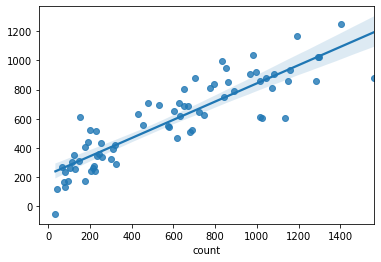

In [21]:
# evaluate the model
# r2 가 1에 가까울 수록 정확한거임

from sklearn.metrics import r2_score,explained_variance_score,mean_absolute_error

predictions=classifier.predict(X_test)
print(f'R^2 score: {r2_score(y_true=y_test, y_pred=predictions):.5f}')
rp=sns.regplot(x=y_test,y=predictions)

In [22]:
import pickle
with open('bike_model_ridge.pkl','wb') as file:
    pickle.dump(classifier,file)

In [23]:
loaded_model = pickle.load(open('bike_model_ridge.pkl', 'rb'))
result = loaded_model.predict([[1,2,3]])
score=loaded_model.score(X_test,y_test)


In [24]:
input_variables=pd.DataFrame([[1,2,3]],
columns=['temperature', 'humidity', 'windspeed'],
                                       dtype=float,)
prediction=classifier.predict(input_variables)
prediction

array([936.50256971])